# Import libraries

In [ ]:
! pip install tensorflow
! pip install opencv-python
! pip install pandas
! pip install numpy 
! pip install matplotlib

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


import cv2

from sklearn.model_selection import train_test_split

# Reading data

In [3]:
import os

BASE_DIR = 'shapes'
shapes = os.listdir(BASE_DIR)
shapes



['circle', 'square', 'triangle']

In [4]:
data = []
target = []
for i, shape in enumerate(shapes):
    path = os.path.join(BASE_DIR, shape)
    for filename in os.listdir(path):
        image = cv2.imread(os.path.join(path , filename),0)
        image = image.reshape(200,200,1)
        data.append(image)
        target.append(i)

# Preprocessing

In [5]:
data = np.array(data)
target = np.array(target)
target = to_categorical(target)

In [6]:
data.shape, target.shape

((11205, 200, 200, 1), (11205, 3))

In [7]:
X_full, X_test, y_full, y_test = train_test_split(data, target, stratify=target, random_state= 42, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, stratify=y_full, random_state= 42, test_size = 0.15)

Let's check some images to see if everything is alright

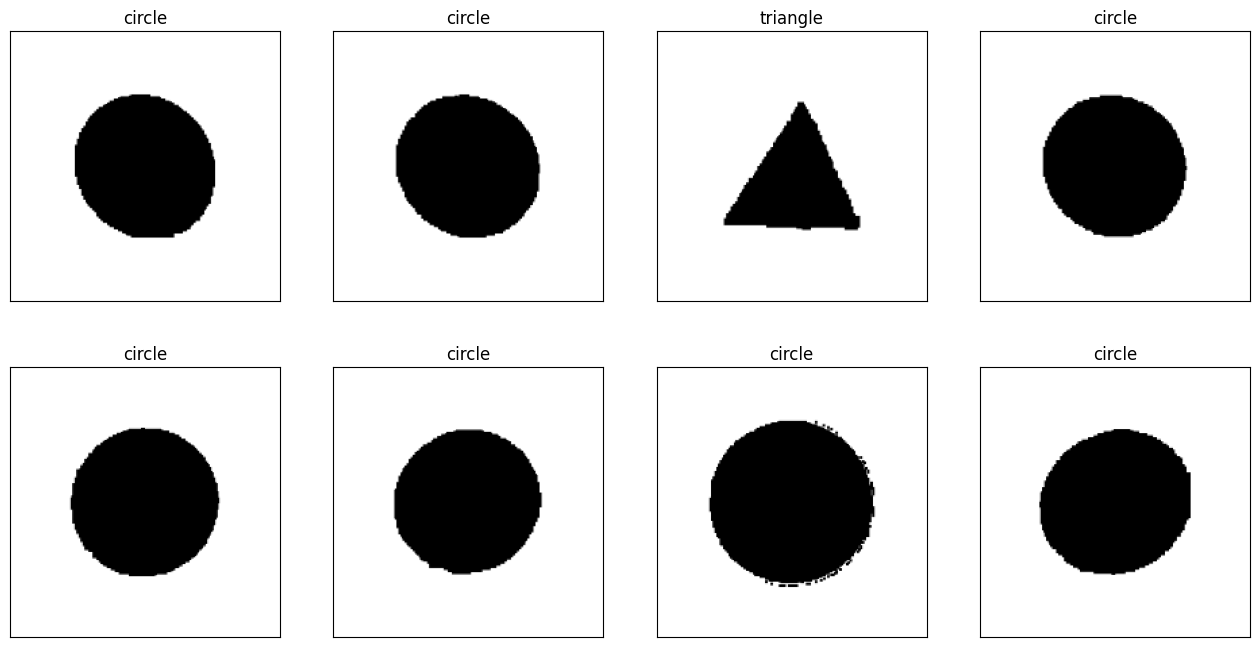

In [8]:
def show_images(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        ax.title.set_text(shapes[np.argmax(y[ind])])
        ax.set_xticks([]) 
        ax.set_yticks([])
show_images(8, X_train, y_train)

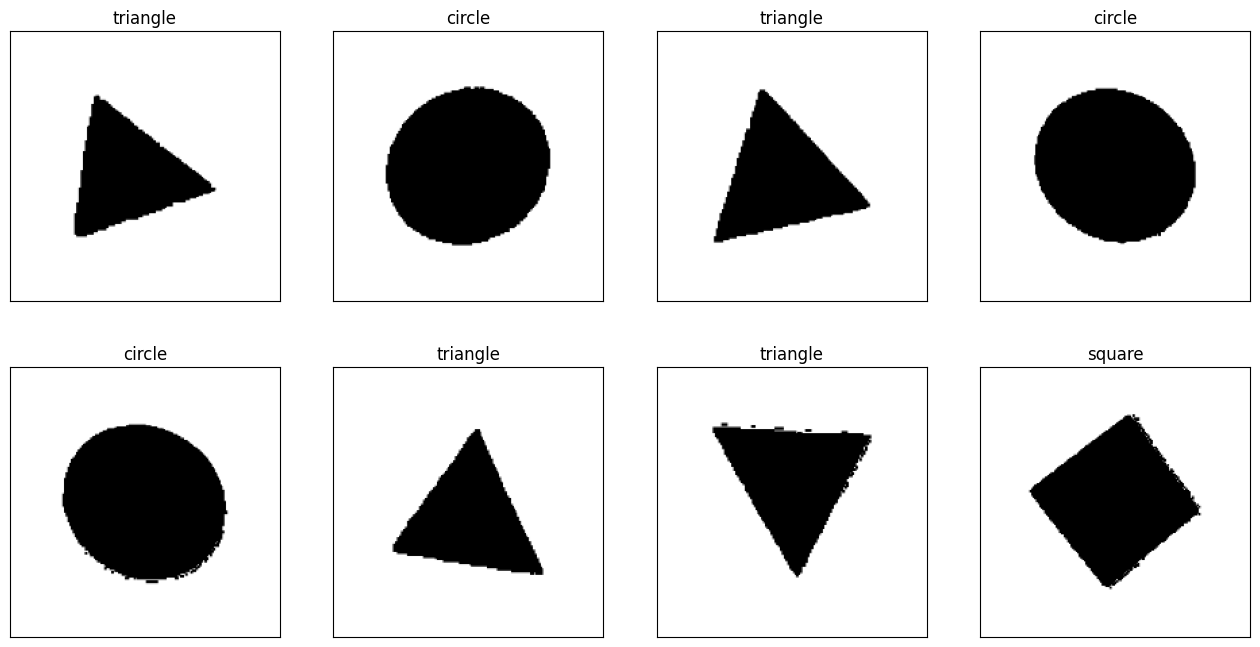

In [9]:
show_images(8, X_val, y_val)

In [10]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1.0/255,
    horizontal_flip=True,
    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale = 1.0/255)

In [11]:
X_test = X_test/255.0
X_train = X_train/255.0
X_val = X_val/255.0

# Modelling

In [14]:
model = Sequential([
    Conv2D(32, (3,3),strides = 2 ,input_shape = (200,200,1), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dropout(0.5),
    
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 99, 99, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,179 (399.14 KB)

 Trainable params: 102,179 (399.14 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val))

Epoch 1/5
224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.8493 - loss: 0.3329 - val_accuracy: 0.9976 - val_loss: 0.0133
Epoch 2/5
224/224 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.9976 - val_loss: 0.0089
Epoch 3/5
224/224 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.9992 - val_loss: 8.5455e-04
Epoch 4/5
224/224 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9968 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 2.0966e-04
Epoch 5/5
224/224 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9973 - loss: 0.0129 - val_accuracy: 0.9984 - val_loss: 0.0040


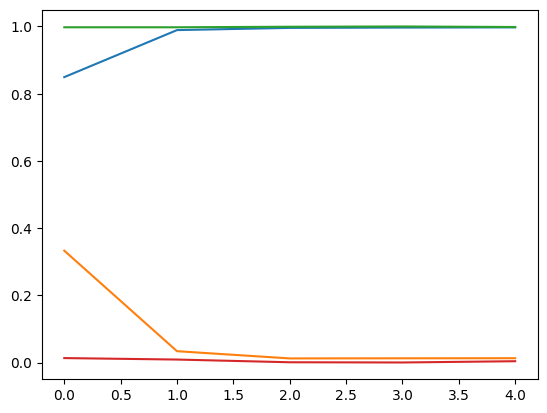

In [16]:
metrics = pd.DataFrame(history.history)
plt.plot(metrics)

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy is {}%'.format(accuracy*100))

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9996 - loss: 6.0664e-04
Accuracy is 99.9643087387085%


In [24]:
def show_images_predicted(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        # Lấy class index từ prediction (y có thể là one-hot hoặc probabilities)
        if len(y[ind].shape) == 0:
            class_idx = int(y[ind])
        else:
            class_idx = np.argmax(y[ind])
        # Chỉ có 3 classes: circle (0), square (1), triangle (2)
        res = shapes[class_idx] if class_idx < len(shapes) else f"class_{class_idx}"
        ax.title.set_text(res)
        ax.set_xticks([]) 
        ax.set_yticks([])

preds = model.predict(X_test)
show_images_predicted(8,X_test, preds)

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


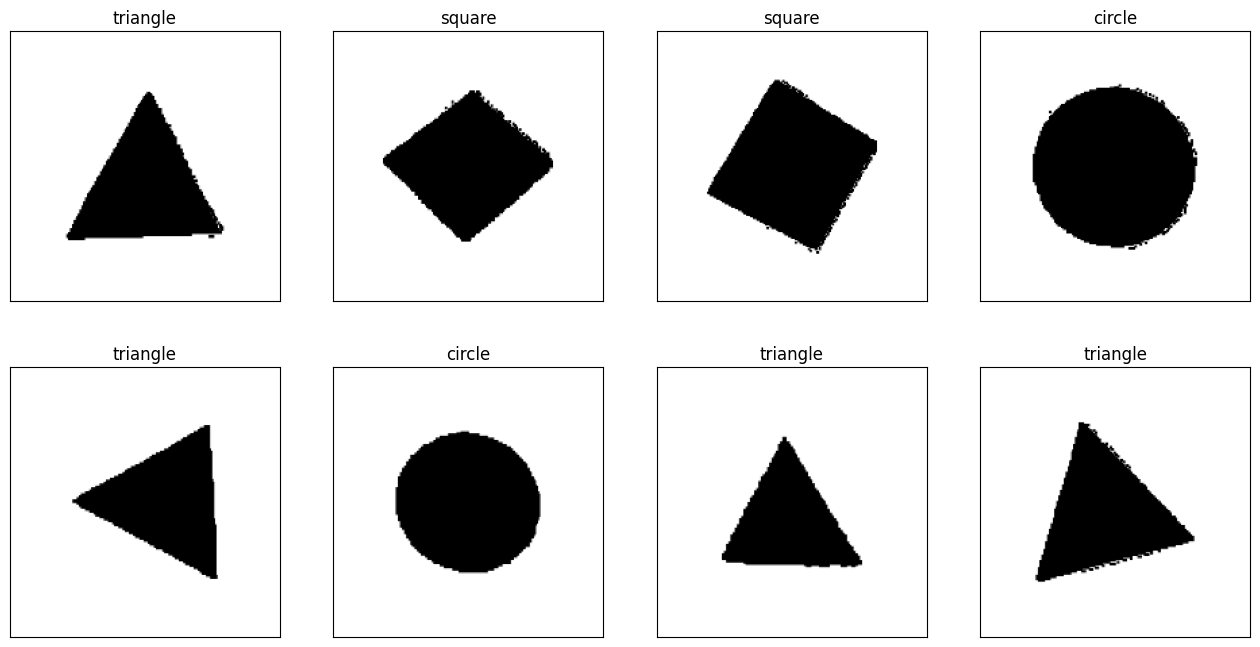

In [25]:
preds = model.predict(X_test)
show_images_predicted(8,X_test, preds)

In [26]:
save_path = 'model.h5'  # Có thể đổi tên file nếu muốn
model.save(save_path)
print(f"✅ Model đã được lưu dưới dạng .h5 tại: {save_path}")

✅ Model đã được lưu dưới dạng .h5 tại: model.h5
